CREATING VISUALISATIONS (FOR THE APP)

In [1]:
# initialisations

import pandas as pd

# when running, change to own local paths
activities_review = pd.read_json('../categories/activities_review.json')
beauty_review = pd.read_json('../categories/beauty_review.json')
food_review = pd.read_json('../categories/food_review.json')
health_review = pd.read_json('../categories/health_review.json')
nightlife_review = pd.read_json('../categories/nightlife_review.json')
pets_review = pd.read_json('../categories/pets_review.json')
services_review = pd.read_json('../categories/services_review.json')
stores_review = pd.read_json('../categories/stores_review.json')

activities = (' '.join(activities_review['text'].dropna()))
beauty = (' '.join(beauty_review['text'].dropna()))
food = (' '.join(food_review['text'].dropna()))
health = (' '.join(health_review['text'].dropna()))
nightlife = (' '.join(nightlife_review['text'].dropna()))
pets = (' '.join(pets_review['text'].dropna()))
services = (' '.join(services_review['text'].dropna()))
stores = (' '.join(stores_review['text'].dropna()))

# comparison list for corpus
all = ' '.join([activities, beauty, food, health, nightlife, pets, services, stores])

# number of words
n = 50

In [ ]:
# deleting unnecessary dataframes

del activities_review
del beauty_review
del food_review
del health_review
del pets_review
del nightlife_review
del services_review
del stores_review

In [2]:
# generating and plotting word clouds w/ n words

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from os import path
import PIL.ImageOps

def generate_wordcloud(category):
    corpus = [category, all]
    vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform(corpus)
    vectorizer.get_feature_names_out()

    i = np.flip(np.argsort(x[0, :].A)[0][-n:])
    scores = np.flip(np.sort(x[0, :].A)[0][-n:])
    words = vectorizer.get_feature_names_out()[i]

    # circular mask
    j, k = np.ogrid[:1000, :1000]
    mask = (j-500)**2 + (k-500)**2 > 400**2
    mask = 255 * mask.astype(int)

    wordcloud = WordCloud(background_color="white", width=2000, height=2000, scale=4, mask=mask)
    wordcloud.generate_from_frequencies(dict(zip(words, scores)))
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

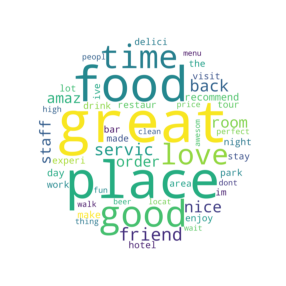

In [3]:
# activities wordcloud

generate_wordcloud(activities)

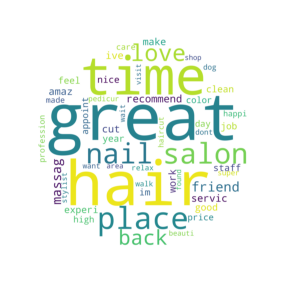

In [4]:
# beauty wordcloud

generate_wordcloud(beauty)

In [5]:
# food wordcloud

generate_wordcloud(food)

KeyboardInterrupt: 

In [9]:
# health wordcloud

generate_wordcloud(health)

In [ ]:
# nightlife wordcloud

generate_wordcloud(nightlife)

In [7]:
# pets wordcloud

generate_wordcloud(pets)

MemoryError: 

In [ ]:
# services wordcloud

generate_wordcloud(services)

In [ ]:
# stores wordcloud

generate_wordcloud(stores)

GRAPHS

In [2]:
import pandas as pd
# when running, change to own local paths
business_review_pos = pd.read_json('../filut/business_review_pos.json')

In [3]:
print(business_review_pos.head())

              business_id                      name           city   latitude  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  Santa Barbara  34.426679   
1  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  Santa Barbara  34.426679   
2  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  Santa Barbara  34.426679   
3  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  Santa Barbara  34.426679   
4  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  Santa Barbara  34.426679   

    longitude  stars_x  is_open                     attributes  \
0 -119.711197      5.0        0  {'ByAppointmentOnly': 'True'}   
1 -119.711197      5.0        0  {'ByAppointmentOnly': 'True'}   
2 -119.711197      5.0        0  {'ByAppointmentOnly': 'True'}   
3 -119.711197      5.0        0  {'ByAppointmentOnly': 'True'}   
4 -119.711197      5.0        0  {'ByAppointmentOnly': 'True'}   

                                          categories  stars_y  useful  \
0  Doctors, Traditional Chinese Medicine, N

In [38]:
activities = pd.read_json('../filut/activities_review.json')

In [25]:
print(activities.head())

              business_id                              name   city   latitude  \
0  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   
1  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   
2  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   
3  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   
4  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   

    longitude  stars_x  is_open  \
0 -116.285382      5.0        1   
1 -116.285382      5.0        1   
2 -116.285382      5.0        1   
3 -116.285382      5.0        1   
4 -116.285382      5.0        1   

                                          attributes  \
0  {'BusinessParking': '{'garage': False, 'street...   
1  {'BusinessParking': '{'garage': False, 'street...   
2  {'BusinessParking': '{'garage': False, 'street...   
3  {'BusinessParking': '{'garage': False, 'street...   
4  {'BusinessParking':

In [68]:

grouped = activities.groupby('categories')['useful'].sum().sort_values(ascending=False)[:10]

grouped = grouped.drop(labels='Candy Stores, Shopping, Department Stores, Fast Food, Beer, Wine & Spirits, Fruits & Veggies, Chinese, Food, Ice Cream & Frozen Yogurt, Desserts, Seafood, Health Markets, Bagels, Cheese Shops, Shopping Centers, Chocolatiers & Shops, Meat Shops, Public Markets, Food Court, Wineries, Local Flavor, Ethnic Food, Restaurants, Specialty Food, Arts & Entertainment, Juice Bars & Smoothies, Seafood Markets, Farmers Market, Coffee & Tea, Bakeries, Food Stands, Dinner Theater, Sporting Goods, Grocery, Fashion')
print(grouped)
#print(activities.loc[activities['categories'] == ['Candy Stores', 'Shopping', 'Department Stores', 'Fast Food', 'Beer', 'Wine & Spirits', 'Fruits & Veggies', 'Chinese', 'Food, Ice Cream & Frozen Yogurt', 'Desserts', 'Seafood', 'Health Markets', 'Bagels', 'Cheese Shops', 'Shopping Centers', 'Chocolatiers & Shops', 'Meat Shops', 'Public Markets', 'Food Court', 'Wineries', 'Local Flavor', 'Ethnic Food', 'Restaurants', 'Specialty Food', 'Arts & Entertainment', 'Juice Bars & Smoothies', 'Seafood Markets', 'Farmers Market', 'Coffee & Tea', 'Bakeries', 'Food Stands', 'Dinner Theater', 'Sporting Goods', 'Grocery', 'Fashion']])

categories
Parks, Active Life                                    7444
Active Life, Parks                                    6742
Event Planning & Services, Hotels, Hotels & Travel    4503
Hotels & Travel, Event Planning & Services, Hotels    3940
Hotels, Event Planning & Services, Hotels & Travel    3727
Hotels & Travel, Hotels, Event Planning & Services    3637
Event Planning & Services, Hotels & Travel, Hotels    3479
Arts & Entertainment, Museums                         3365
Hotels, Hotels & Travel, Event Planning & Services    3223
Name: useful, dtype: int64


In [47]:
print(activities.head())

              business_id                              name   city   latitude  \
0  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   
1  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   
2  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   
3  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   
4  fvWn8oXXwbj2l79cochZyw  Altitude Trampoline Park - Boise  Boise  43.616763   

    longitude  stars_x  is_open  \
0 -116.285382      5.0        1   
1 -116.285382      5.0        1   
2 -116.285382      5.0        1   
3 -116.285382      5.0        1   
4 -116.285382      5.0        1   

                                          attributes  \
0  {'BusinessParking': '{'garage': False, 'street...   
1  {'BusinessParking': '{'garage': False, 'street...   
2  {'BusinessParking': '{'garage': False, 'street...   
3  {'BusinessParking': '{'garage': False, 'street...   
4  {'BusinessParking':

In [44]:
type(activities['categories'])

pandas.core.series.Series

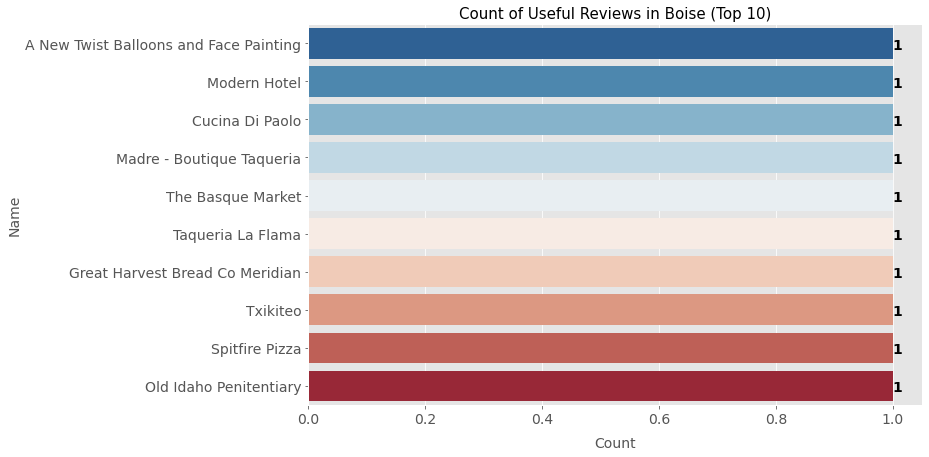

In [267]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# Count of Positive Reviews by City (Top 10)
plt.figure(figsize=(11,7))
temp = activities.loc[activities['city'] == 'Boise']
#grouped = temp.categories.value_counts()[:10]
grouped = temp.groupby('name')['useful'].sum().sort_values(ascending=False)[:10]
test = {'name': list(grouped.index.values), 'useful': list(grouped.values)}
test = pd.DataFrame(test, columns=['name', 'useful'])
#grouped.columns = ['name', 'useful']
#grouped = temp.useful.value_counts()
#grouped = grouped.drop(labels='Candy Stores, Shopping, Department Stores, Fast Food, Beer, Wine & Spirits, Fruits & Veggies, Chinese, Food, Ice Cream & Frozen Yogurt, Desserts, Seafood, Health Markets, Bagels, Cheese Shops, Shopping Centers, Chocolatiers & Shops, Meat Shops, Public Markets, Food Court, Wineries, Local Flavor, Ethnic Food, Restaurants, Specialty Food, Arts & Entertainment, Juice Bars & Smoothies, Seafood Markets, Farmers Market, Coffee & Tea, Bakeries, Food Stands, Dinner Theater, Sporting Goods, Grocery, Fashion')
sns.countplot(y='name', data=test,
               palette=sns.color_palette("RdBu_r", len(test)))
plt.xlabel('Count', labelpad=10, fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.title('Count of Useful Reviews in Boise (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(test.name.value_counts()[:10]):
   plt.text(v, int(i)+0.15, str(v), fontweight='bold', fontsize=14)
#for i in range(len(test)):
#    plt.text(i,int(test['useful'].iloc[i]), str(test['name'].iloc[i]), fontweight='bold', fontsize=14)

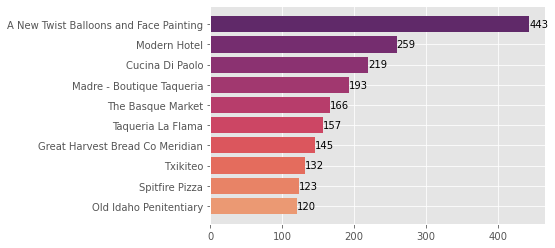

In [283]:
#print(test)
fig, ax = plt.subplots()
grouped_rev = grouped[::-1]  
plt.barh(grouped_rev.index.values, grouped_rev.values, color=sns.color_palette("flare", len(grouped)))
plt.xlabel('Count', labelpad=10)
plt.ylabel('Name')
plt.title('Count of Useful Reviews in Boise (Top 10)')
for i, v in enumerate(grouped_rev):
    ax.text(v, int(i), str(v), verticalalignment='center')

In [239]:
#print(temp)
test = {'name': grouped.index.values, 'useful': grouped.values}
test = pd.DataFrame(test, columns=['name', 'useful'])
test = test.reset_index(drop=True)
print(test)


                                     name  useful
0  A New Twist Balloons and Face Painting     443
1                            Modern Hotel     259
2                         Cucina Di Paolo     219
3               Madre - Boutique Taqueria     193
4                       The Basque Market     166
5                       Taqueria La Flama     157
6         Great Harvest Bread Co Meridian     145
7                                Txikiteo     132
8                          Spitfire Pizza     123
9                  Old Idaho Penitentiary     120


AttributeError: 'Series' object has no attribute 'categories'

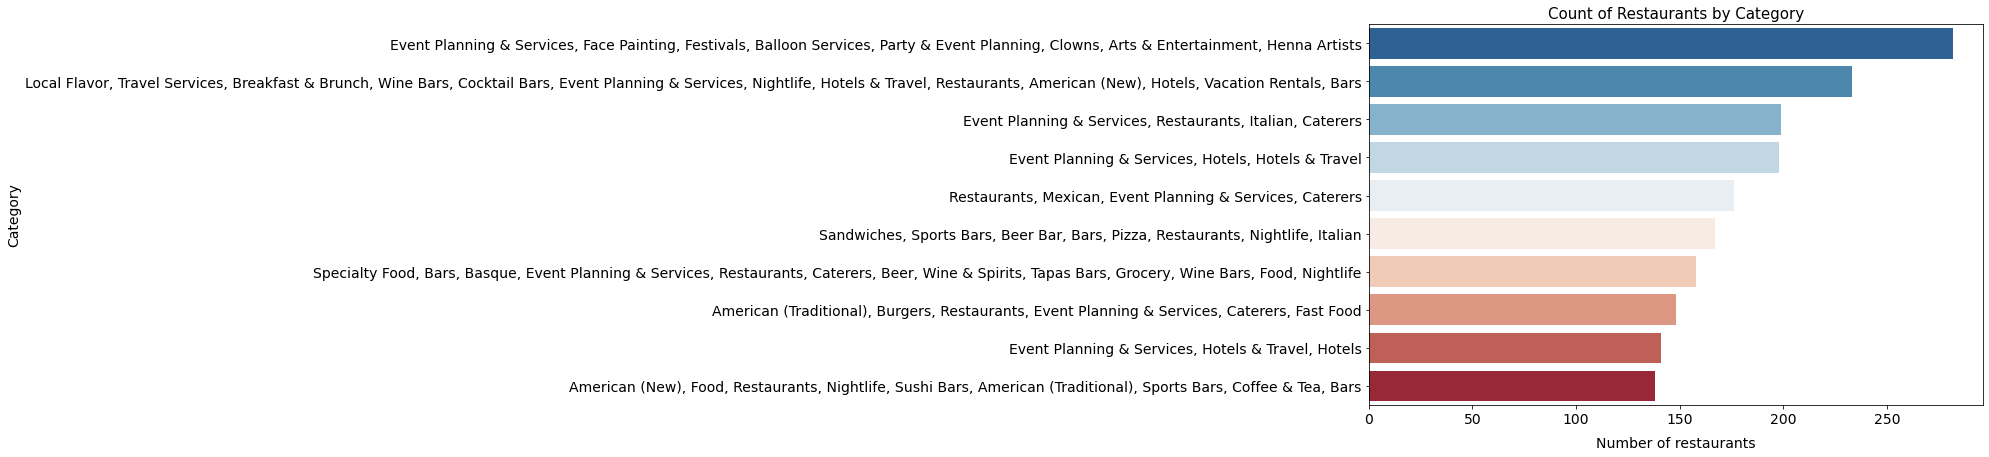

In [85]:
plt.figure(figsize=(11,7))
grouped = temp.categories.value_counts()[:10]
sns.countplot(y='categories',data=temp, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped.categories.value_counts()[:10]):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

In [73]:
print(grouped)
print(temp)
#print(temp.head())

Series([], Name: useful, dtype: int64)
Empty DataFrame
Columns: [business_id, name, city, latitude, longitude, stars_x, is_open, attributes, categories, stars_y, useful, text]
Index: []
